# 73 STRINGS CASE STUDY FOR INTERNSHIP
# NAME   : SAURAV
# COLLEGE: INDIAN INSTITUTE OF TECHNOLOGY KHARAGPUR
# EMAIL  : saurav9801583979@gmail.com
# MOBILE : 8210734082

In [1]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

In [2]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saurav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_excel(r'C:\Users\saurav\Desktop\73 Strings\Amazon_Unlocked_Mobile.xlsx')

In [4]:
data.head()

,Brand Name,Rating,review
0,Samsung,5,I feel so LUCKY to have found this used (phone...
1,Samsung,4,"nice phone, nice up grade from my pantach revu..."
2,Samsung,5,Very pleased
3,Samsung,4,It works good but it goes slow sometimes but i...
4,Samsung,4,Great phone to replace my lost phone. The only...


## Preprocessing
### PreProcessing that needs to be done on lower cased corpus
### Remove html tags
### Remove URLS
### Remove non alphanumeric character
### Remove Stopwords
### Perform stemming and lemmatization

#### Removing Rows having NULL values in row coloumns

In [5]:
data. isnull(). sum()

Brand Name    65171
Rating            0
review           81
dtype: int64

In [6]:
data = data.dropna(subset=['review'])

### Remove html tags
### Remove URLS
### Remove non alphanumeric character
### Remove Stopwords
### Perform stemming and lemmatization

In [7]:
data["review"] = data["review"].astype("str")

In [8]:
nltk.download('punkt')

#all text to lowercase and remove unwanted signs 
def remove_unwanted_chars(text):
    allowed_chars = """ abcdefghijklmnopqrstuvwxyz;,!.?"""
    clean_text = text.lower()
    for c in clean_text:
        if allowed_chars.find(c) == -1:
            clean_text = clean_text.replace(c, "")
        else:
            pass
    return clean_text



#removing HTML
def remove_html(text):    
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)



#removing URL
def remove_URL(text):  
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)



# emoticons
# symbols & pictographs
# transport & map symbols
# flags (iOS)
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", text)



#removing stopwords
def remove_stopwords(text, stop_words):  
    filtered_sentence = []
    for w in text.split(" "): 
        if w not in stop_words: 
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    return text



#getting correct words
def make_sentences_correct(text): 
    val = re.split('[!.,?;\s]+', text)
    text = " ".join(val)
    return text             



# getting lemmas
def get_lemma(text): 
    word_tokens = word_tokenize(text)
    return " ".join(word_tokens)

                        

#removing whitespaces from start and end
def remove_white_spaces(text): 
    text = text.strip() 
    return text      

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saurav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
data["review"] = data.review.map(lambda x: remove_unwanted_chars(x))
data["review"] = data.review.map(lambda x: remove_URL(x))
data["review"] = data.review.map(lambda x: remove_html(x))
data["review"] = data.review.map(lambda x: remove_emoji(x))
data["review"] = data.review.map(lambda x: remove_stopwords(x, stop_words))
data["review"] = data.review.map(lambda x: make_sentences_correct(x))
data["review"] = data.review.map(lambda x: get_lemma(x))
data["review"] = data.review.map(lambda x: remove_white_spaces(x))

In [10]:
data.head()

,Brand Name,Rating,review
0,Samsung,5,feel lucky found used phone us used hard all p...
1,Samsung,4,nice phone nice grade pantach revue clean set ...
2,Samsung,5,pleased
3,Samsung,4,works good goes slow sometimes good phone love
4,Samsung,4,great phone replace lost phone thing volume bu...


In [11]:
def func(val):
    if val==5:
        return('very positive')
    elif val==4:
        return('positive')
    elif val==3:
        return('neutral')
    elif val==2:
        return('negative')
    else:
        return('very negative')


data['sentiment'] = data['Rating'].apply(func)

In [12]:
def this_fun(doc):
    return(str(doc))
data['review']=data['review'].apply(this_fun)

## Exploratory Data Analysis
### Print Statistics of Data like avg length of sentence
### Proposition of data w.r.t class labels

In [13]:
data

,Brand Name,Rating,review,sentiment
0,Samsung,5,feel lucky found used phone us used hard all p...,very positive
1,Samsung,4,nice phone nice grade pantach revue clean set ...,positive
2,Samsung,5,pleased,very positive
3,Samsung,4,works good goes slow sometimes good phone love,positive
4,Samsung,4,great phone replace lost phone thing volume bu...,positive
...,...,...,...,...
413835,Samsung,5,another great deal great price,very positive
413836,Samsung,3,ok,neutral
413837,Samsung,5,passes every drop test onto porcelain tile,very positive
413838,Samsung,3,returned meet needs seemed good selection others,neutral


In [14]:
data.dtypes

Brand Name    object
Rating         int64
review        object
sentiment     object
dtype: object

Distribution of two classes: 
sentiment
negative          24717
neutral           31762
positive          61369
very negative     72337
very positive    223574
Name: sentiment, dtype: int64
Average number of words in each document:  0.33686276310605934
Plot showing number of words variation in documents: 


<BarContainer object of 5000 artists>

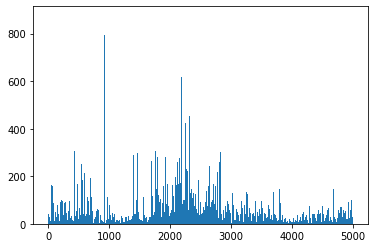

In [15]:
print("Distribution of two classes: ")
print(data.groupby("sentiment").sentiment.count())

count = 0
word_count = []
for i in range(5000):
    temp = len(data.iloc[i]["review"].split(" "))
    word_count.append(temp)
    count+=temp

print("Average number of words in each document: ", count/data.shape[0])
print("Plot showing number of words variation in documents: ")
plt.bar(np.arange(5000), word_count, width=5)

## Using different vectorizer for tranformation¶

In [16]:
X = data['review']
Y = data['sentiment']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

In [18]:
type(X)

pandas.core.series.Series

In [19]:
print(len(X_train.index))
print(len(X_test.index))

331007
82752


### Count Vectorizer
#### It tokenizes all words/letters with length atleast 2
#### Converts everything to lower case
#### Builds a Vocabulary

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df=3,ngram_range=(1, 2)).fit(X_train)  

In [21]:
# Printing Vocabulary
count_vect.get_feature_names()[::500]

['aa',
 'able tell',
 'absorption bumper',
 'access function',
 'accidentally push',
 'acctually locked',
 'actions used',
 'active didnt',
 'actually lighter',
 'adapter sim',
 'adding apps',
 'adequate photos',
 'advance quit',
 'advertisement say',
 'aforementioned app',
 'again maybe',
 'ago idea',
 'air inch',
 'alittle slow',
 'all type',
 'allows whole',
 'along att',
 'already intimate',
 'also color',
 'also mm',
 'also time',
 'although reception',
 'always looks',
 'amazing compatible',
 'amazon again',
 'amazon overall',
 'amenities cant',
 'analyzes device',
 'android comparable',
 'android setting',
 'annoy',
 'another gsm',
 'answered touchscreen',
 'anymore two',
 'anything lies',
 'anyways put',
 'app air',
 'app proximity',
 'appear unlocked',
 'apple nerd',
 'applications section',
 'apps care',
 'apps nonfunctional',
 'appsbank music',
 'areas cell',
 'around display',
 'arrive new',
 'articulate',
 'asked call',
 'assony xperia',
 'att app',
 'att sucks',
 'attract

In [22]:
# Printing length of Vocabulary
print(len(count_vect.get_feature_names())) 

490168


In [23]:
# Getting Bag of words representation for all the documents
X_train_count_vectorized = count_vect.transform(X_train)    
X_train_count_vectorized

<331007x490168 sparse matrix of type '<class 'numpy.int64'>'
	with 11526084 stored elements in Compressed Sparse Row format>

In [24]:
X_train_count_vectorized.shape

(331007, 490168)

### Tf-idf Vectorizer
#### It tokenizes all words/letters with length atleast 2
#### Converts everything to lower case
#### Builds a Vocabulary using tf-idf values


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=3,ngram_range=(1, 2)).fit(X_train)  

In [26]:
# Printing Vocabulary
tfidf_vect.get_feature_names()[::500]    

['aa',
 'able tell',
 'absorption bumper',
 'access function',
 'accidentally push',
 'acctually locked',
 'actions used',
 'active didnt',
 'actually lighter',
 'adapter sim',
 'adding apps',
 'adequate photos',
 'advance quit',
 'advertisement say',
 'aforementioned app',
 'again maybe',
 'ago idea',
 'air inch',
 'alittle slow',
 'all type',
 'allows whole',
 'along att',
 'already intimate',
 'also color',
 'also mm',
 'also time',
 'although reception',
 'always looks',
 'amazing compatible',
 'amazon again',
 'amazon overall',
 'amenities cant',
 'analyzes device',
 'android comparable',
 'android setting',
 'annoy',
 'another gsm',
 'answered touchscreen',
 'anymore two',
 'anything lies',
 'anyways put',
 'app air',
 'app proximity',
 'appear unlocked',
 'apple nerd',
 'applications section',
 'apps care',
 'apps nonfunctional',
 'appsbank music',
 'areas cell',
 'around display',
 'arrive new',
 'articulate',
 'asked call',
 'assony xperia',
 'att app',
 'att sucks',
 'attract

In [27]:
# Printing length of Vocabulary
print(len(tfidf_vect.get_feature_names()))   

490168


In [28]:
# Getting Bag of words representation for all the documents
X_train_tfidf_vectorized = tfidf_vect.transform(X_train)    
X_train_tfidf_vectorized

<331007x490168 sparse matrix of type '<class 'numpy.float64'>'
	with 11526084 stored elements in Compressed Sparse Row format>

In [29]:
X_train_tfidf_vectorized.shape

(331007, 490168)

## Fitting Machine Learning Model
## Logistic regression
### Logistic Regression using transformation with count vectorizer

In [30]:
from sklearn.linear_model import LogisticRegression
model_count_LR = LogisticRegression()
model_count_LR.fit(X_train_count_vectorized, Y_train)

C:\Users\saurav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
from sklearn.metrics import accuracy_score
X_test_transformed = count_vect.transform(X_test)
Y_pred_count_LR = model_count_LR.predict(X_test_transformed)
print(classification_report(Y_test, Y_pred_count_LR))
count_LR_accuracy=accuracy_score(Y_test, Y_pred_count_LR)
print(count_LR_accuracy)

               precision    recall  f1-score   support

     negative       0.76      0.54      0.63      4982
      neutral       0.74      0.54      0.63      6376
     positive       0.75      0.48      0.59     12370
very negative       0.82      0.89      0.85     14360
very positive       0.84      0.96      0.90     44664

     accuracy                           0.82     82752
    macro avg       0.78      0.68      0.72     82752
 weighted avg       0.81      0.82      0.81     82752

0.8198472544470224


In [32]:
from sklearn.metrics import confusion_matrix
cm_count_LR=confusion_matrix(Y_test,Y_pred_count_LR)
cm_count_LR

array([[ 2683,   323,   212,  1294,   470],
       [  288,  3472,   580,   772,  1264],
       [  123,   434,  5960,   366,  5487],
       [  373,   275,   169, 12744,   799],
       [   75,   217,  1034,   353, 42985]], dtype=int64)

Text(69.0, 0.5, 'Truth')

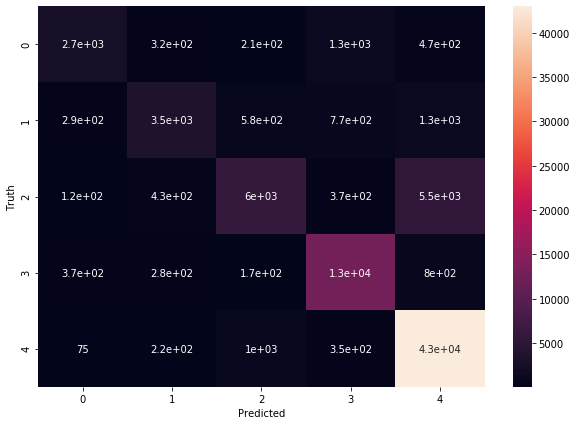

In [33]:
plt.figure(figsize=(10,7))
sn.heatmap(cm_count_LR,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
#roc_auc_score
from sklearn.metrics import roc_auc_score
Y_pred_count_LR_proba=model_count_LR.predict_proba(X_test_transformed)
count_LR_roc_auc_score=roc_auc_score(Y_test, Y_pred_count_LR_proba,multi_class='ovr')
print(count_LR_roc_auc_score)

0.927381197932936


### Logistic Regression using transformation with Tf-idf vectorizer

In [35]:
from sklearn.linear_model import LogisticRegression
model_tfidf_LR = LogisticRegression()
model_tfidf_LR.fit(X_train_tfidf_vectorized, Y_train)

C:\Users\saurav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
from sklearn.metrics import accuracy_score
X_test_transformed = tfidf_vect.transform(X_test)
Y_pred_tfidf_LR = model_tfidf_LR.predict(X_test_transformed)
print(classification_report(Y_test, Y_pred_tfidf_LR))
tfidf_LR_accuracy=accuracy_score(Y_test, Y_pred_tfidf_LR)
print(tfidf_LR_accuracy)

               precision    recall  f1-score   support

     negative       0.74      0.33      0.46      4982
      neutral       0.66      0.38      0.48      6376
     positive       0.66      0.38      0.48     12370
very negative       0.75      0.90      0.82     14360
very positive       0.82      0.96      0.88     44664

     accuracy                           0.78     82752
    macro avg       0.72      0.59      0.62     82752
 weighted avg       0.76      0.78      0.75     82752

0.7789539829853055


In [37]:
from sklearn.metrics import confusion_matrix
cm_tfidf_LR=confusion_matrix(Y_test,Y_pred_tfidf_LR)
cm_tfidf_LR

array([[ 1634,   352,   285,  2047,   664],
       [  214,  2441,   799,  1243,  1679],
       [   80,   479,  4675,   572,  6564],
       [  226,   241,   197, 12899,   797],
       [   44,   212,  1099,   498, 42811]], dtype=int64)

Text(69.0, 0.5, 'Truth')

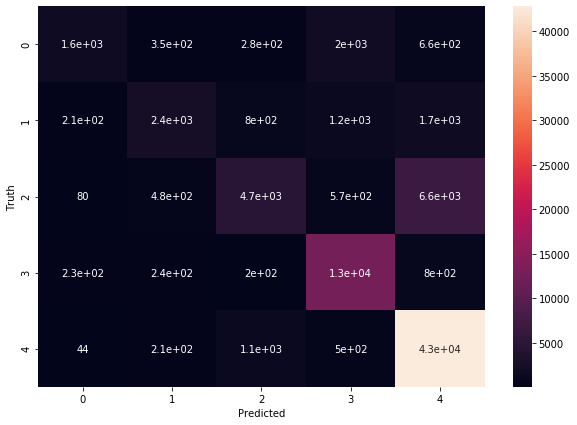

In [38]:
plt.figure(figsize=(10,7))
sn.heatmap(cm_tfidf_LR,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
#roc_auc_score
from sklearn.metrics import roc_auc_score
Y_pred_tfidf_LR_proba=model_tfidf_LR.predict_proba(X_test_transformed)
tfidf_LR_roc_auc_score=roc_auc_score(Y_test, Y_pred_tfidf_LR_proba,multi_class='ovr')
print(tfidf_LR_roc_auc_score)

0.9137463067722512


In [40]:
## Looking into learned features

feature_names = np.array(tfidf_vect.get_feature_names())
sorted_coef_index = model_tfidf_LR.coef_[0].argsort()

print('Largest Coeff')
print(feature_names[sorted_coef_index[:-10:-1]])

print('Smallest Coeff')
print(feature_names[sorted_coef_index[:10]])

Largest Coeff
['disappointed' 'poor' 'slow' 'return' 'terrible' 'started' 'horrible'
 'two stars' 'returning']
Smallest Coeff
['love' 'far' 'great' 'perfect' 'awesome' 'easy' 'amazing' 'excellent'
 'fast' 'perfectly']


## Random Forest
### Random forest using transformation with count vectorizer

In [41]:
from sklearn.ensemble import RandomForestClassifier
model_count_RF=RandomForestClassifier(n_estimators=5, random_state=0)
model_count_RF.fit(X_train_count_vectorized,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_test_transformed = count_vect.transform(X_test)
Y_pred_count_RF = model_count_RF.predict(X_test_transformed)
print(classification_report(Y_test, Y_pred_count_RF))
count_RF_accuracy=accuracy_score(Y_test, Y_pred_count_RF)
print(count_RF_accuracy)

               precision    recall  f1-score   support

     negative       0.79      0.69      0.73      4982
      neutral       0.80      0.66      0.72      6376
     positive       0.81      0.61      0.69     12370
very negative       0.83      0.88      0.85     14360
very positive       0.87      0.95      0.91     44664

     accuracy                           0.85     82752
    macro avg       0.82      0.75      0.78     82752
 weighted avg       0.84      0.85      0.84     82752

0.8462877030162413


In [43]:
cm_count_RF=confusion_matrix(Y_test,Y_pred_count_RF)
cm_count_RF

array([[ 3420,   169,   184,   751,   458],
       [  142,  4181,   319,   631,  1103],
       [  151,   266,  7503,   474,  3976],
       [  407,   312,   264, 12598,   779],
       [  217,   325,   995,   797, 42330]], dtype=int64)

Text(69.0, 0.5, 'Truth')

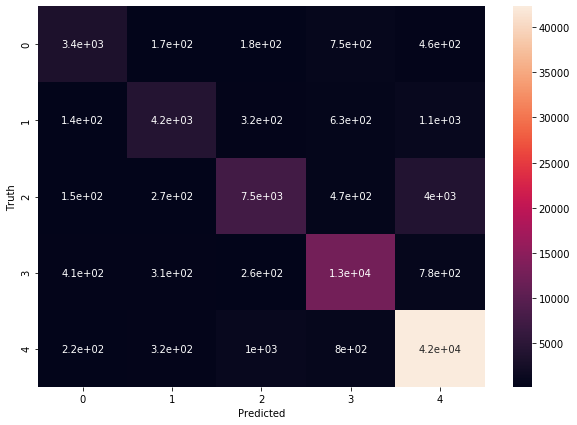

In [44]:
plt.figure(figsize=(10,7))
sn.heatmap(cm_count_RF,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
#roc_auc_score
Y_pred_count_RF_proba=model_count_RF.predict_proba(X_test_transformed)
count_RF_roc_auc_score=roc_auc_score(Y_test, Y_pred_count_RF_proba,multi_class='ovr')
print(count_RF_roc_auc_score)

0.921618800087493


### Random forest using transformation with Tf-idf vectorizer

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_tfidf_RF=RandomForestClassifier(n_estimators=5, random_state=0)
model_tfidf_RF.fit(X_train_tfidf_vectorized,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_test_transformed = tfidf_vect.transform(X_test)
Y_pred_tfidf_RF = model_tfidf_RF.predict(X_test_transformed)
print(classification_report(Y_test, Y_pred_tfidf_RF))
tfidf_RF_accuracy=accuracy_score(Y_test, Y_pred_tfidf_RF)
print(tfidf_RF_accuracy)

               precision    recall  f1-score   support

     negative       0.80      0.68      0.73      4982
      neutral       0.81      0.66      0.72      6376
     positive       0.82      0.60      0.69     12370
very negative       0.83      0.88      0.85     14360
very positive       0.87      0.95      0.91     44664

     accuracy                           0.85     82752
    macro avg       0.82      0.75      0.78     82752
 weighted avg       0.85      0.85      0.84     82752

0.8482211910286156


In [48]:
cm_tfidf_RF=confusion_matrix(Y_test,Y_pred_tfidf_RF)
cm_tfidf_RF

array([[ 3383,   182,   187,   770,   460],
       [  178,  4178,   321,   618,  1081],
       [  158,   237,  7472,   482,  4021],
       [  371,   311,   261, 12580,   837],
       [  165,   254,   904,   762, 42579]], dtype=int64)

Text(69.0, 0.5, 'Truth')

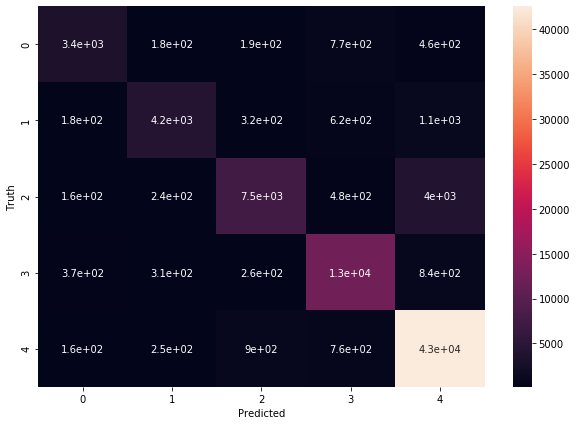

In [49]:
plt.figure(figsize=(10,7))
sn.heatmap(cm_tfidf_RF,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
#roc_auc_score
Y_pred_tfidf_RF_proba=model_tfidf_RF.predict_proba(X_test_transformed)
tfidf_RF_roc_auc_score=roc_auc_score(Y_test, Y_pred_tfidf_RF_proba,multi_class='ovr')
print(tfidf_RF_roc_auc_score)

0.9173480932714989


## XG Boost Classifier
### XG Boost Classifier using transformation with count vectorizer

In [51]:
!pip install xgboost

In [52]:
from xgboost import XGBClassifier
model_count_xgb = XGBClassifier()
model_count_xgb.fit(X_train_count_vectorized, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
X_test_transformed = count_vect.transform(X_test)
Y_pred_count_xgb = model_count_xgb.predict(X_test_transformed)
# accuracy score
print(classification_report(Y_test, Y_pred_count_xgb))
count_xgb_accuracy=accuracy_score(Y_test, Y_pred_count_xgb)
print(count_xgb_accuracy)

               precision    recall  f1-score   support

     negative       0.77      0.17      0.27      4982
      neutral       0.69      0.19      0.30      6376
     positive       0.59      0.20      0.30     12370
very negative       0.69      0.78      0.73     14360
very positive       0.73      0.97      0.83     44664

     accuracy                           0.71     82752
    macro avg       0.69      0.46      0.49     82752
 weighted avg       0.70      0.71      0.66     82752

0.7125145011600929


In [54]:
cm_count_xgb=confusion_matrix(Y_test,Y_pred_count_xgb)
cm_count_xgb

array([[  831,   176,   295,  2162,  1518],
       [   97,  1225,   654,  1393,  3007],
       [   40,   204,  2452,   666,  9008],
       [   82,   118,   189, 11177,  2794],
       [   23,    61,   596,   707, 43277]], dtype=int64)

Text(69.0, 0.5, 'Truth')

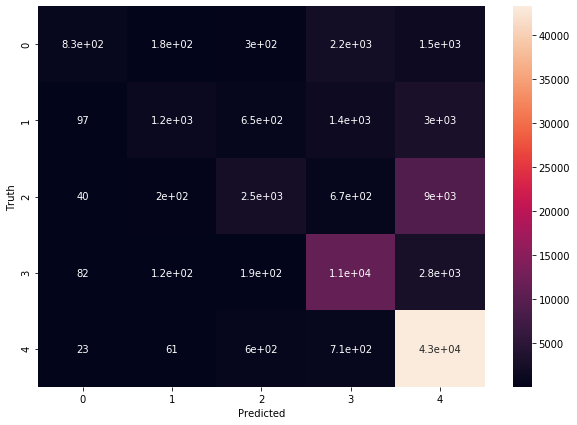

In [55]:
plt.figure(figsize=(10,7))
sn.heatmap(cm_count_xgb,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
#roc_auc_score
Y_pred_count_xgb_proba=model_count_xgb.predict_proba(X_test_transformed)
count_xgb_roc_auc_score=roc_auc_score(Y_test, Y_pred_count_xgb_proba,multi_class='ovr')
print(count_xgb_roc_auc_score)

0.8703620286497518


### XG Boost Classifier using transformation with Tf-idf vectorizer¶

In [57]:
from xgboost import XGBClassifier
model_tfidf_xgb = XGBClassifier()
model_tfidf_xgb.fit(X_train_tfidf_vectorized, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
X_test_transformed = tfidf_vect.transform(X_test)
Y_pred_tfidf_xgb = model_tfidf_xgb.predict(X_test_transformed)
# accuracy score
print(classification_report(Y_test, Y_pred_tfidf_xgb))
tfidf_xgb_accuracy=accuracy_score(Y_test, Y_pred_tfidf_xgb)
print(tfidf_xgb_accuracy)

               precision    recall  f1-score   support

     negative       0.80      0.19      0.31      4982
      neutral       0.70      0.21      0.32      6376
     positive       0.62      0.23      0.33     12370
very negative       0.69      0.81      0.75     14360
very positive       0.74      0.97      0.84     44664

     accuracy                           0.73     82752
    macro avg       0.71      0.48      0.51     82752
 weighted avg       0.72      0.73      0.68     82752

0.7257347254447022


In [59]:
cm_tfidf_xgb=confusion_matrix(Y_test,Y_pred_tfidf_xgb)
cm_tfidf_xgb

array([[  961,   181,   244,  2270,  1326],
       [   94,  1341,   675,  1521,  2745],
       [   41,   215,  2841,   731,  8542],
       [   99,   114,   192, 11674,  2281],
       [   11,    71,   644,   699, 43239]], dtype=int64)

Text(69.0, 0.5, 'Truth')

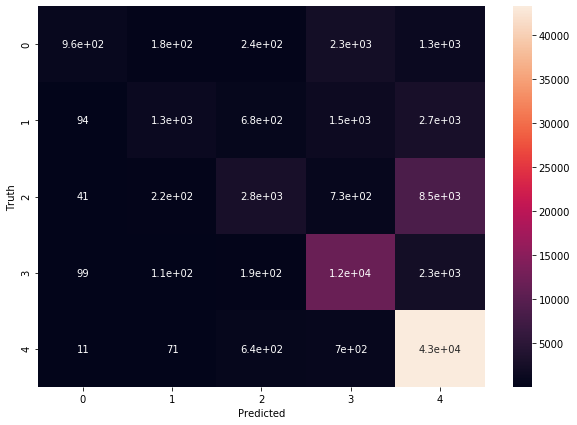

In [60]:
plt.figure(figsize=(10,7))
sn.heatmap(cm_tfidf_xgb,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
#roc_auc_score
Y_pred_tfidf_xgb_proba=model_tfidf_xgb.predict_proba(X_test_transformed)
tfidf_xgb_roc_auc_score=roc_auc_score(Y_test, Y_pred_tfidf_xgb_proba, multi_class='ovr')
print(tfidf_xgb_roc_auc_score)

0.8815604440754393


# Predicted the sentiment of Mobile reviews of scrapped Data from Amazon

### scrapped data is generated in the xlsx format
### scrapper code is in another ipynb file

In [62]:
dataset = pd.read_excel(r'C:\Users\saurav\Desktop\Mobile_Reviews.xlsx')

In [63]:
dataset.head()

,Mobile Name,reviews
0,OnePlus 8 (Glacial Green 6GB RAM+128GB Storage),Hell man! Im a oneplus fan till i buy this mob...
1,OnePlus 8 (Onyx Black 12GB RAM+256GB Storage),EXCELLENT PRODUCT WITH SUPER FAST SPEED!!\nRev...
2,OnePlus 8 (Onyx Black 8GB RAM+128GB Storage),"First of All, OnePlus phones are now Made In I..."
3,OnePlus 8 Pro (Glacial Green 12GB RAM+256GB St...,The phone has a dark band on the status bar. A...
4,OnePlus 8 (Glacial Green 8GB RAM+128GB Storage),I have been a OnePlus user from few years.\nAn...


## Preprocessing

In [64]:
dataset["reviews"] = dataset["reviews"].astype("str")

In [65]:
dataset["reviews"] = dataset.reviews.map(lambda x: remove_unwanted_chars(x))
dataset["reviews"] = dataset.reviews.map(lambda x: remove_URL(x))
dataset["reviews"] = dataset.reviews.map(lambda x: remove_html(x))
dataset["reviews"] = dataset.reviews.map(lambda x: remove_emoji(x))
dataset["reviews"] = dataset.reviews.map(lambda x: remove_stopwords(x, stop_words))
dataset["reviews"] = dataset.reviews.map(lambda x: make_sentences_correct(x))
dataset["reviews"] = dataset.reviews.map(lambda x: get_lemma(x))
dataset["reviews"] = dataset.reviews.map(lambda x: remove_white_spaces(x))

In [66]:
dataset.head()

,Mobile Name,reviews
0,OnePlus 8 (Glacial Green 6GB RAM+128GB Storage),hell man im oneplus fan till buy mobile camera...
1,OnePlus 8 (Onyx Black 12GB RAM+256GB Storage),excellent product super fast speed review came...
2,OnePlus 8 (Onyx Black 8GB RAM+128GB Storage),first all oneplus phones made india totally on...
3,OnePlus 8 Pro (Glacial Green 12GB RAM+256GB St...,phone dark band status bar clearly seen photo ...
4,OnePlus 8 (Glacial Green 8GB RAM+128GB Storage),oneplus user years and upgraded op i must say ...


### compare accuracy and auc score for selecting model

In [67]:
print('accuracy in logistic regression using count vector:          ',count_LR_accuracy)
print('roc_auc_score in logistic regression using count vector:     ',count_LR_roc_auc_score)
print('\n')
print('accuracy in logistic regression using Tf-idf vector:         ',tfidf_LR_accuracy)
print('roc_auc_score in logistic regression using Tf-idf vector:    ',tfidf_LR_roc_auc_score)
print('\n')
print('\n')
print('accuracy in Random Forest Classifier using count vector:     ',count_RF_accuracy)
print('roc_auc_score in Random Forest Classifier using count vector:',count_RF_roc_auc_score)
print('\n')
print('accuracy in Random Forest Classifier using Tf-idf vector:    ',tfidf_RF_accuracy)
print('roc_auc_score in Random Forest Classifier using Tf-idf vector:',tfidf_RF_roc_auc_score)
print('\n')
print('\n')
print('accuracy in XG Boost Classifier using count vector:          ',count_xgb_accuracy)
print('roc_auc_score in XG Boost Classifier using count vector:     ',count_xgb_roc_auc_score)
print('\n')
print('accuracy in XG Boost Classifier using Tf-idf vector:         ',tfidf_xgb_accuracy)
print('roc_auc_score in XG Boost Classifier using Tf-idf vector:    ',tfidf_xgb_roc_auc_score)

accuracy in logistic regression using count vector:           0.8198472544470224
roc_auc_score in logistic regression using count vector:      0.927381197932936


accuracy in logistic regression using Tf-idf vector:          0.7789539829853055
roc_auc_score in logistic regression using Tf-idf vector:     0.9137463067722512




accuracy in Random Forest Classifier using count vector:      0.8462877030162413
roc_auc_score in Random Forest Classifier using count vector: 0.921618800087493


accuracy in Random Forest Classifier using Tf-idf vector:     0.8482211910286156
roc_auc_score in Random Forest Classifier using Tf-idf vector: 0.9173480932714989




accuracy in XG Boost Classifier using count vector:           0.7125145011600929
roc_auc_score in XG Boost Classifier using count vector:      0.8703620286497518


accuracy in XG Boost Classifier using Tf-idf vector:          0.7257347254447022
roc_auc_score in XG Boost Classifier using Tf-idf vector:     0.8815604440754393


### Here random forest classifier using count vectorizer has better accuracy and roc_auc_score

#### data transformation using count vectorizer

In [68]:
X_test_new=dataset['reviews']

In [69]:
X_test_new_transformed=count_vect.transform(X_test_new)

### sentiment prediction

In [70]:
Y_test_new_prediction=model_count_RF.predict(X_test_new_transformed)

In [71]:
Y_predicted=pd.DataFrame(Y_test_new_prediction,columns=['reviews'])

In [72]:
Y_predicted

,reviews
0,very positive
1,neutral
2,very positive
3,positive
4,negative
...,...
93,neutral
94,neutral
95,neutral
96,very negative


In [73]:
result = pd.concat([dataset, Y_predicted], axis=1, join='inner')

In [74]:
result

,Mobile Name,reviews,reviews
0,OnePlus 8 (Glacial Green 6GB RAM+128GB Storage),hell man im oneplus fan till buy mobile camera...,very positive
1,OnePlus 8 (Onyx Black 12GB RAM+256GB Storage),excellent product super fast speed review came...,neutral
2,OnePlus 8 (Onyx Black 8GB RAM+128GB Storage),first all oneplus phones made india totally on...,very positive
3,OnePlus 8 Pro (Glacial Green 12GB RAM+256GB St...,phone dark band status bar clearly seen photo ...,positive
4,OnePlus 8 (Glacial Green 8GB RAM+128GB Storage),oneplus user years and upgraded op i must say ...,negative
...,...,...,...
93,"OPPO A12 (Blue, 4GB RAM, 64GB Storage) with No...",lot better phones available market guess way l...,neutral
94,"OPPO Reno3 Pro (Midnight Black, 8GB RAM, 128GB...",waste poor cheap rd class quality camera camer...,neutral
95,"OPPO A12 (Blue, 3GB RAM, 32GB Storage) with No...",lot better phones available market guess way l...,neutral
96,"OPPO Reno2 F (Lake Green, 8GB RAM, 128GB Stora...",midrange specs flagship price fraud company co...,very negative


In [75]:
result.to_excel(r'C:\Users\saurav\Desktop/Predicted_sentiment_of_scrapped_data.xlsx',index = False)